<a href="https://colab.research.google.com/github/2021-FIIT-Bc-projects/BP-Fagan-CNN-Huby/blob/develop/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import time
import pathlib
import PIL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

NAME = "edible-vs-poisonous-cnn-64x2-{}".format(int(time.time()))
CATEGORIES = ["boletus", "amanita"]

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/boletus_vs_amanita"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

369


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 387 files belonging to 2 classes.
Using 310 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 387 files belonging to 2 classes.
Using 77 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['amanita', 'boletus']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential()

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3)))  #
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3)))  #
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=50)

model.summary()

Epoch 1/50
10/10 [==============================] - 5s 350ms/step - loss: 5.0453 - accuracy: 0.8290 - val_loss: 326.9262 - val_accuracy: 0.6364
Epoch 2/50
10/10 [==============================] - 3s 326ms/step - loss: 1.7834 - accuracy: 0.8677 - val_loss: 125.0627 - val_accuracy: 0.7922
Epoch 3/50
10/10 [==============================] - 3s 328ms/step - loss: 0.4124 - accuracy: 0.9226 - val_loss: 156.0176 - val_accuracy: 0.7792
Epoch 4/50
10/10 [==============================] - 3s 325ms/step - loss: 0.1147 - accuracy: 0.9677 - val_loss: 208.8574 - val_accuracy: 0.7013
Epoch 5/50
10/10 [==============================] - 3s 324ms/step - loss: 0.0587 - accuracy: 0.9774 - val_loss: 227.1562 - val_accuracy: 0.6753
Epoch 6/50
10/10 [==============================] - 3s 326ms/step - loss: 0.0314 - accuracy: 0.9871 - val_loss: 115.5316 - val_accuracy: 0.7143
Epoch 7/50
10/10 [==============================] - 3s 325ms/step - loss: 0.0600 - accuracy: 0.9903 - val_loss: 107.6611 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/model_boletus_vs_amanita_387imgs_50epochs_100acc_98valacc_7_12_2021_17_05')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/model_boletus_vs_amanita_387imgs_50epochs_100acc_98valacc_7_12_2021_17_05/assets


In [ ]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model_boletus_vs_amanita_387imgs_50epochs_100acc_98valacc_7_12_2021_17_05')

model_loaded.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 178, 178, 128)     3584      
                                                                 
 activation_25 (Activation)  (None, 178, 178, 128)     0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 89, 89, 128)      512       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 89, 89, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 256)      

Prediction: 1.0
This image most likely belongs to: boletus


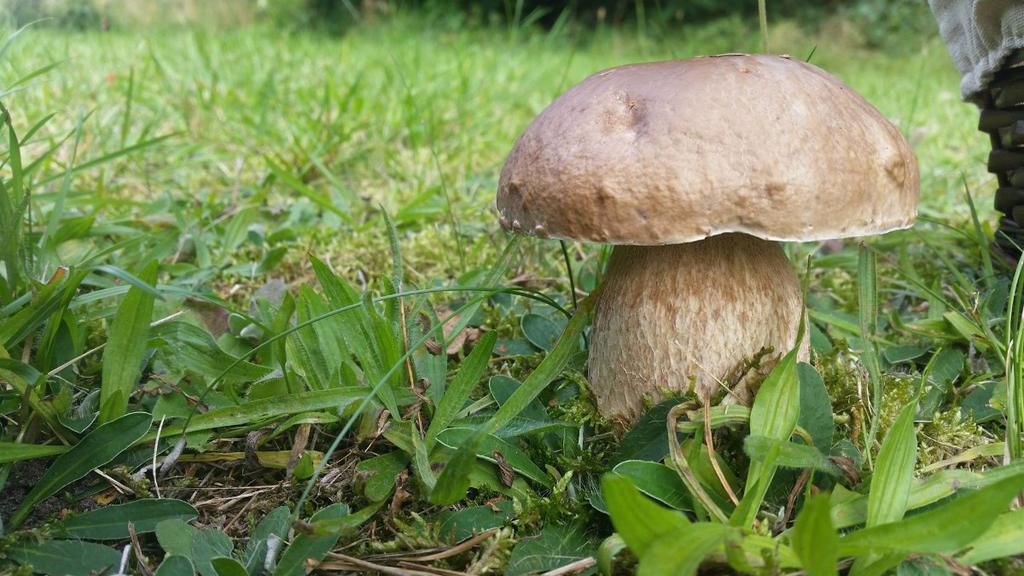

In [ ]:
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/EKV2017-9217335_rJPOFaLoW.JPG" # muchotravka
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/EKV2017-9219519_H1Rkpasj-.JPG" # muchotravka
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/CUV2017-9224390_BJDKFy_hb.JPG" # muchotravka

data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/ARO2015-9190406_B1W-7TQRl.JPG" # dub
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/FDE2014PIC60764313.JPG" #dub
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/APE2017-9196671_rk6iCYUEZ.JPG" # dub


image_path = pathlib.Path(data_dir)

img= tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_loaded.predict(img_array)
score = tf.nn.softmax(predictions[0])

index = 1
if(predictions[0][0] < 0.5):
    index = 0

print('Prediction:', predictions[0][0])
print(
    "This image most likely belongs to: {}"
    .format(class_names[index])
)

PIL.Image.open(str(data_dir))

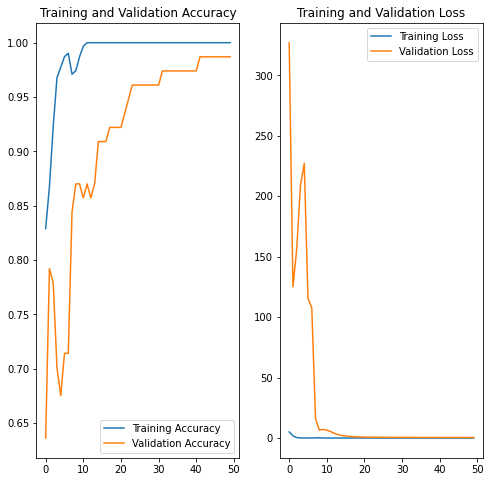

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()